# Group Information
|ID|Name|
|--|----|
|22127224|Trương Thuân Kiệt|
|22127254|Phạm Minh Mẫn|

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [3]:
train

,id,Age,Gender,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,target
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,...,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


- From the first view of dataset, we could recognize:
    - `feature_1`: Marital Status
    - `feature_3`: Educational Level
    - `feature_4`: Occupation Status
    - `feature_6`: Location Type
    - `feature_16`: Housing Type

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1200000 non-null  int64  
 1   Age         1181295 non-null  float64
 2   Gender      1200000 non-null  object 
 3   feature_0   1155051 non-null  float64
 4   feature_1   1181471 non-null  object 
 5   feature_2   1090328 non-null  float64
 6   feature_3   1200000 non-null  object 
 7   feature_4   841925 non-null   object 
 8   feature_5   1125924 non-null  float64
 9   feature_6   1200000 non-null  object 
 10  feature_7   1200000 non-null  object 
 11  feature_8   835971 non-null   float64
 12  feature_9   1199994 non-null  float64
 13  feature_10  1062118 non-null  float64
 14  feature_11  1199999 non-null  float64
 15  feature_12  1200000 non-null  object 
 16  feature_13  1122176 non-null  object 
 17  feature_14  1200000 non-null  object 
 18  feature_15  1200000 no

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          800000 non-null  int64  
 1   Age         787511 non-null  float64
 2   Gender      800000 non-null  object 
 3   feature_0   770140 non-null  float64
 4   feature_1   787664 non-null  object 
 5   feature_2   726870 non-null  float64
 6   feature_3   800000 non-null  object 
 7   feature_4   560875 non-null  object 
 8   feature_5   750551 non-null  float64
 9   feature_6   800000 non-null  object 
 10  feature_7   800000 non-null  object 
 11  feature_8   557198 non-null  float64
 12  feature_9   799997 non-null  float64
 13  feature_10  708549 non-null  float64
 14  feature_11  799998 non-null  float64
 15  feature_12  800000 non-null  object 
 16  feature_13  747724 non-null  object 
 17  feature_14  800000 non-null  object 
 18  feature_15  800000 non-null  object 
 19  fe

### Categorical Columns

In [6]:
categorical_features = train.select_dtypes(include=[object])
categorical_features = categorical_features.drop(columns=['feature_12'])

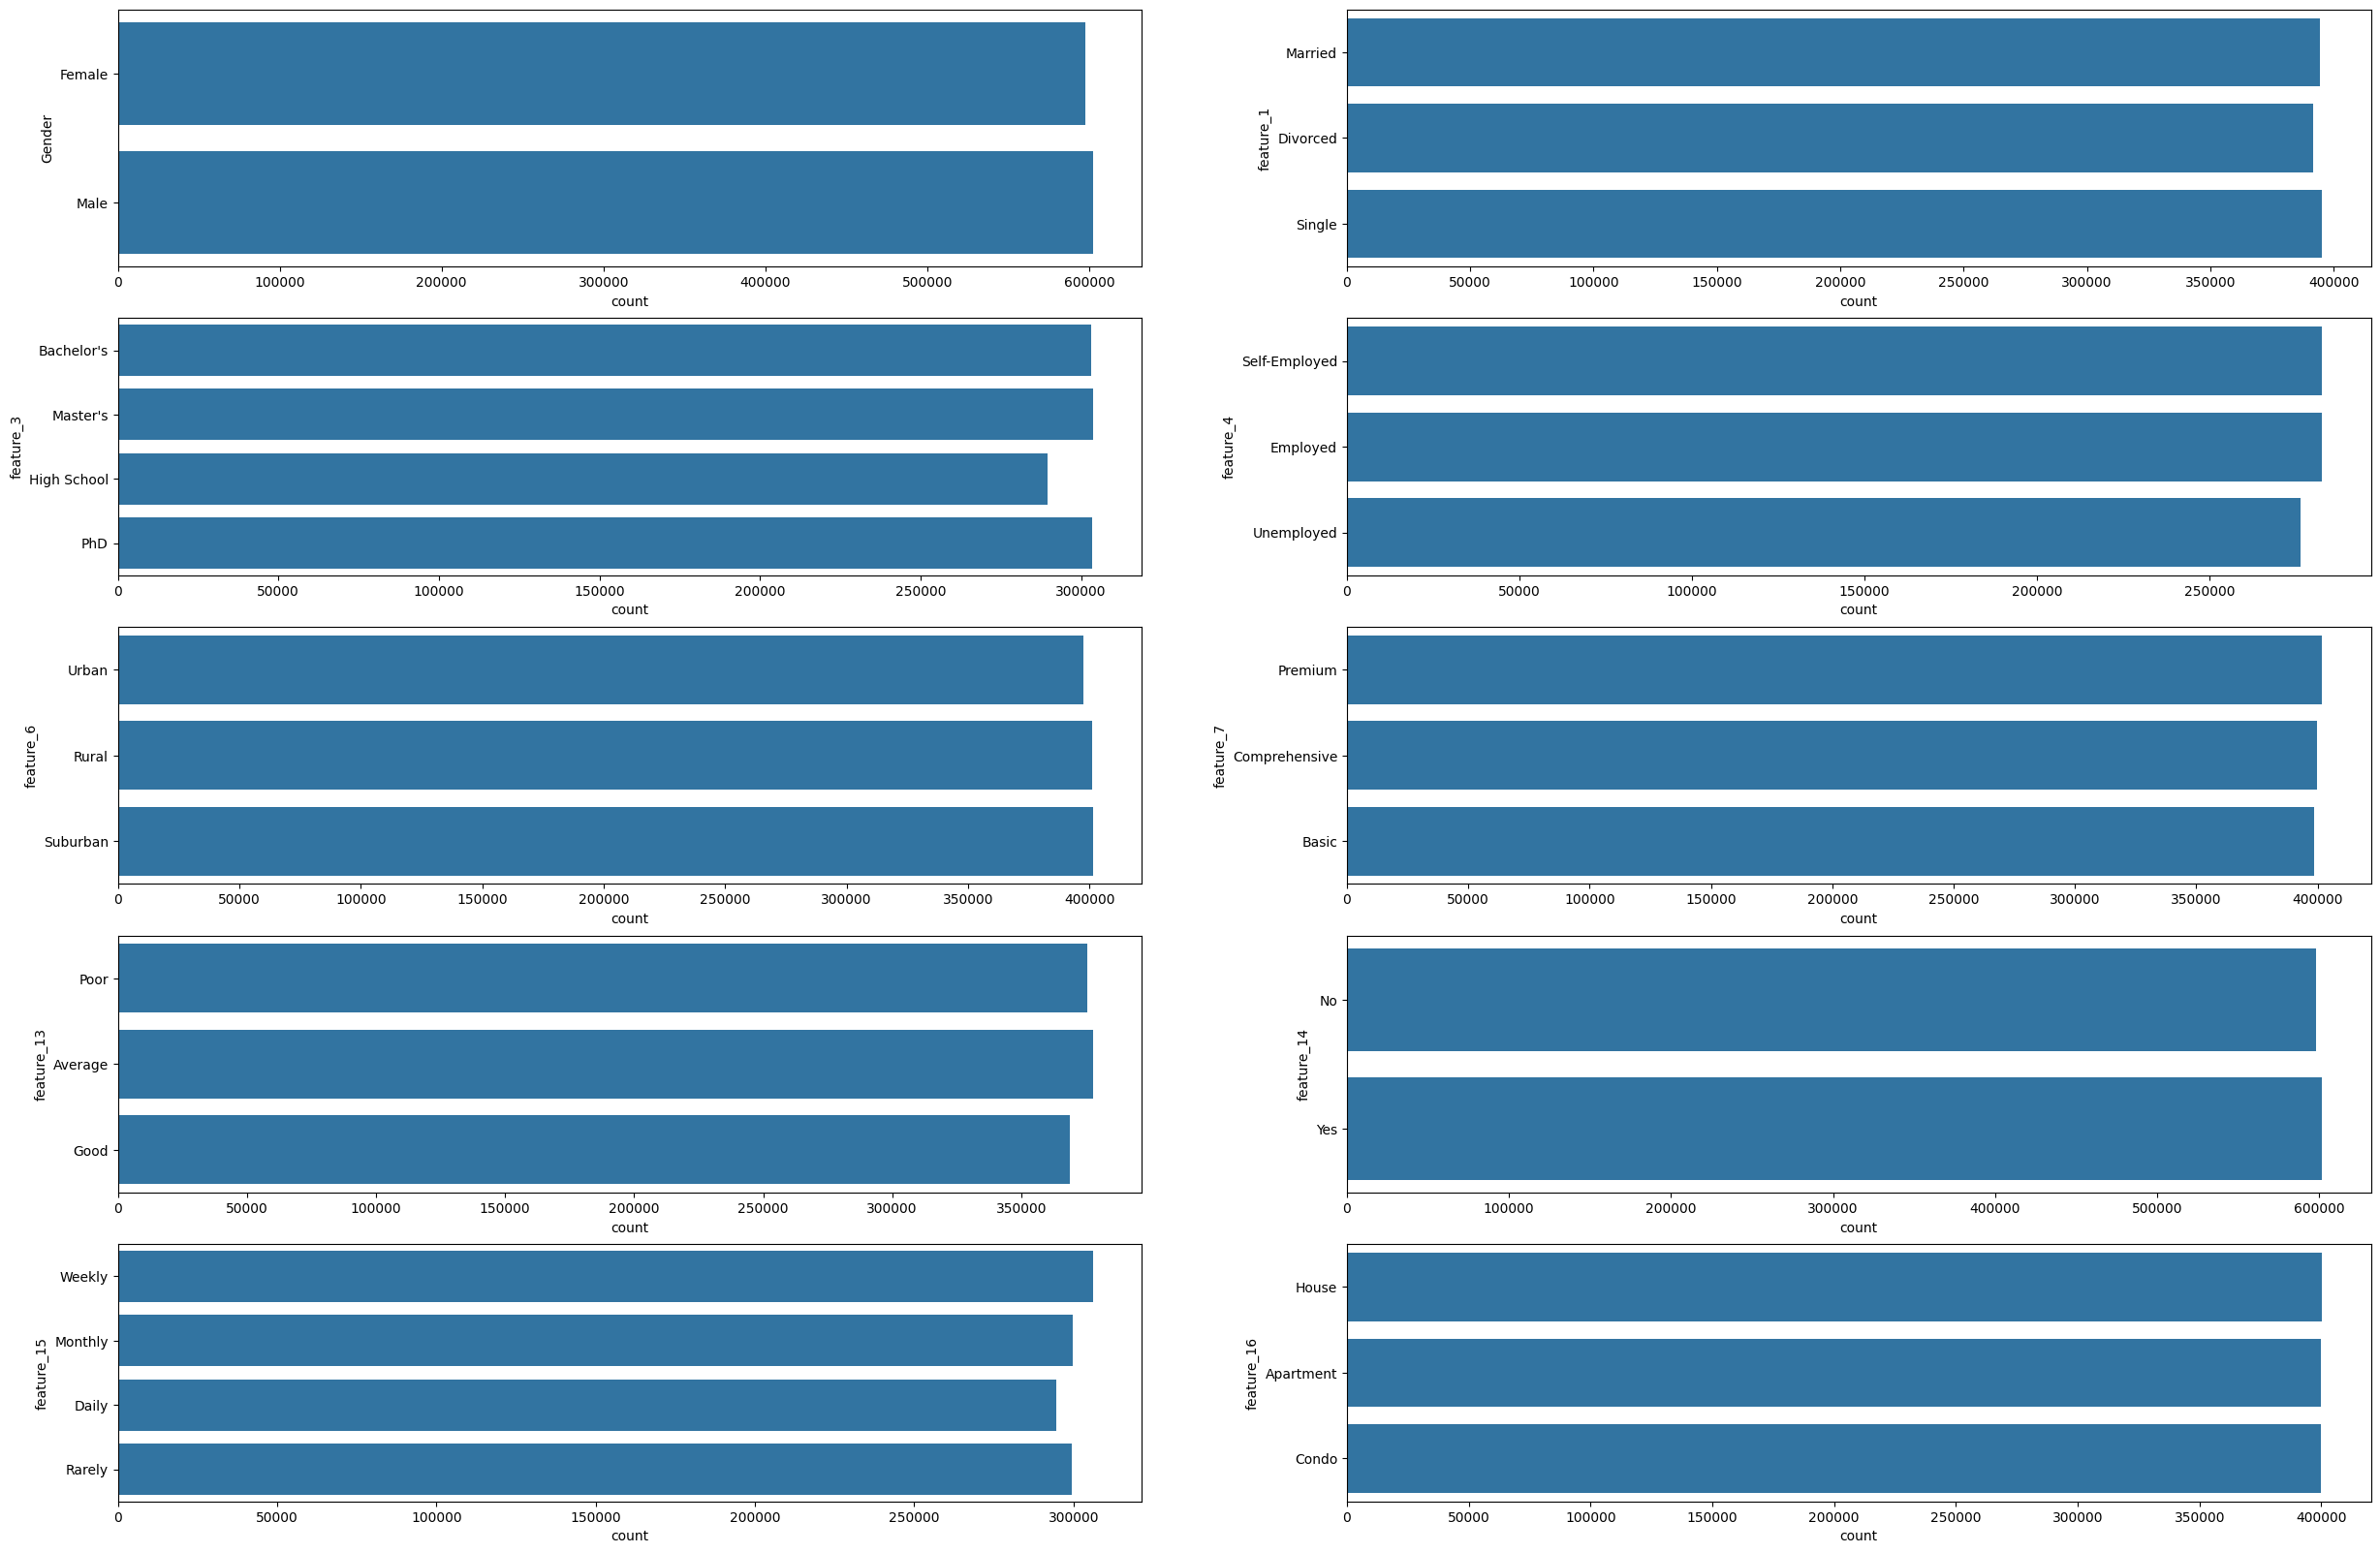

In [7]:
# Distribution of categorical features 
fig, ax = plt.subplots(5, 2, figsize=(30, 20))
for variable, subplot in zip(categorical_features.columns, ax.flatten()):
    sns.countplot(train[variable], ax=subplot)
        

### Analysis
1. **Gender**
    - **Observation:** The dataset has a slightly higher proportion of Male compared to Female.
    - **Implication:** The imbalance is not severe, so it is unlikely to cause significant bias in the model.
2. **feature_1 (Marital Status)**
    - **Observation:** The dataset has a fairly balanced distribution across Married, Divorced, and Single categories.
    - **Implication:** The balance ensures that the model can learn patterns for all marital statuses without bias.
3. **feature_13 (Education Level)**
    - **Observation:** The dataset shows a higher proportion of individuals with Bachelor's and Master's degrees compared to High School and PhD.
    - **Implication:** The model may perform better for individuals with higher education levels due to their higher representation.
4. **feature_4 (Employment Status)**
    - **Observation:** The majority of individuals are Employed, followed by Self-Employed and Unemployed.
    - **Implication:** The imbalance may cause the model to focus more on the Employed category.
5. **feature_6 (Location Type)**
    - **Observation:** The dataset has a balanced distribution across Urban, Rural, and Suburban locations.
    - **Implication:** The balance ensures that the model can learn patterns for all location types effectively.
6. **feature_7 (Maybe Tier-related feature)**
    - **Observation:** The dataset has a relatively balanced distribution across Basic, Comprehensive, and Premium tiers.
    - **Implication:** The model can learn patterns for all subscription tiers without significant bias.
7. **feature_15 (Frequency of Activity)**
    - **Observation:** The dataset shows a higher proportion of individuals with Monthly and Weekly activity compared to Daily and Rarely.
    - **Implication:** The model may perform better for individuals with more frequent activity due to their higher representation.
8. **feature_14 (Binary Feature)**
    - **Observation:** The dataset has a binary distribution with a higher proportion of No compared to Yes.
    - **Implication:** The imbalance may cause the model to predict No more frequently.
9. **feature_16 (Housing Type)**
    - **Observation:** The dataset has a balanced distribution across House, Apartment, and Condo.
    - **Implication:** The balance ensures that the model can learn patterns for all housing types effectively.

- For time feature: feature_12, we would try to separate date, month, year, sin and cos of those features.
- Also from the glance of distribution of each feature, we can apply encoding methods below:
    - One-hot encoding: Gender, feature_1, feature_4, feature_6, feature_16.
    - Label encoding: feature_14.
    - Ordinal encoding: feature_3, feature_7, feature_13, feature_15.
    - Frequency encoding: all categorical features.

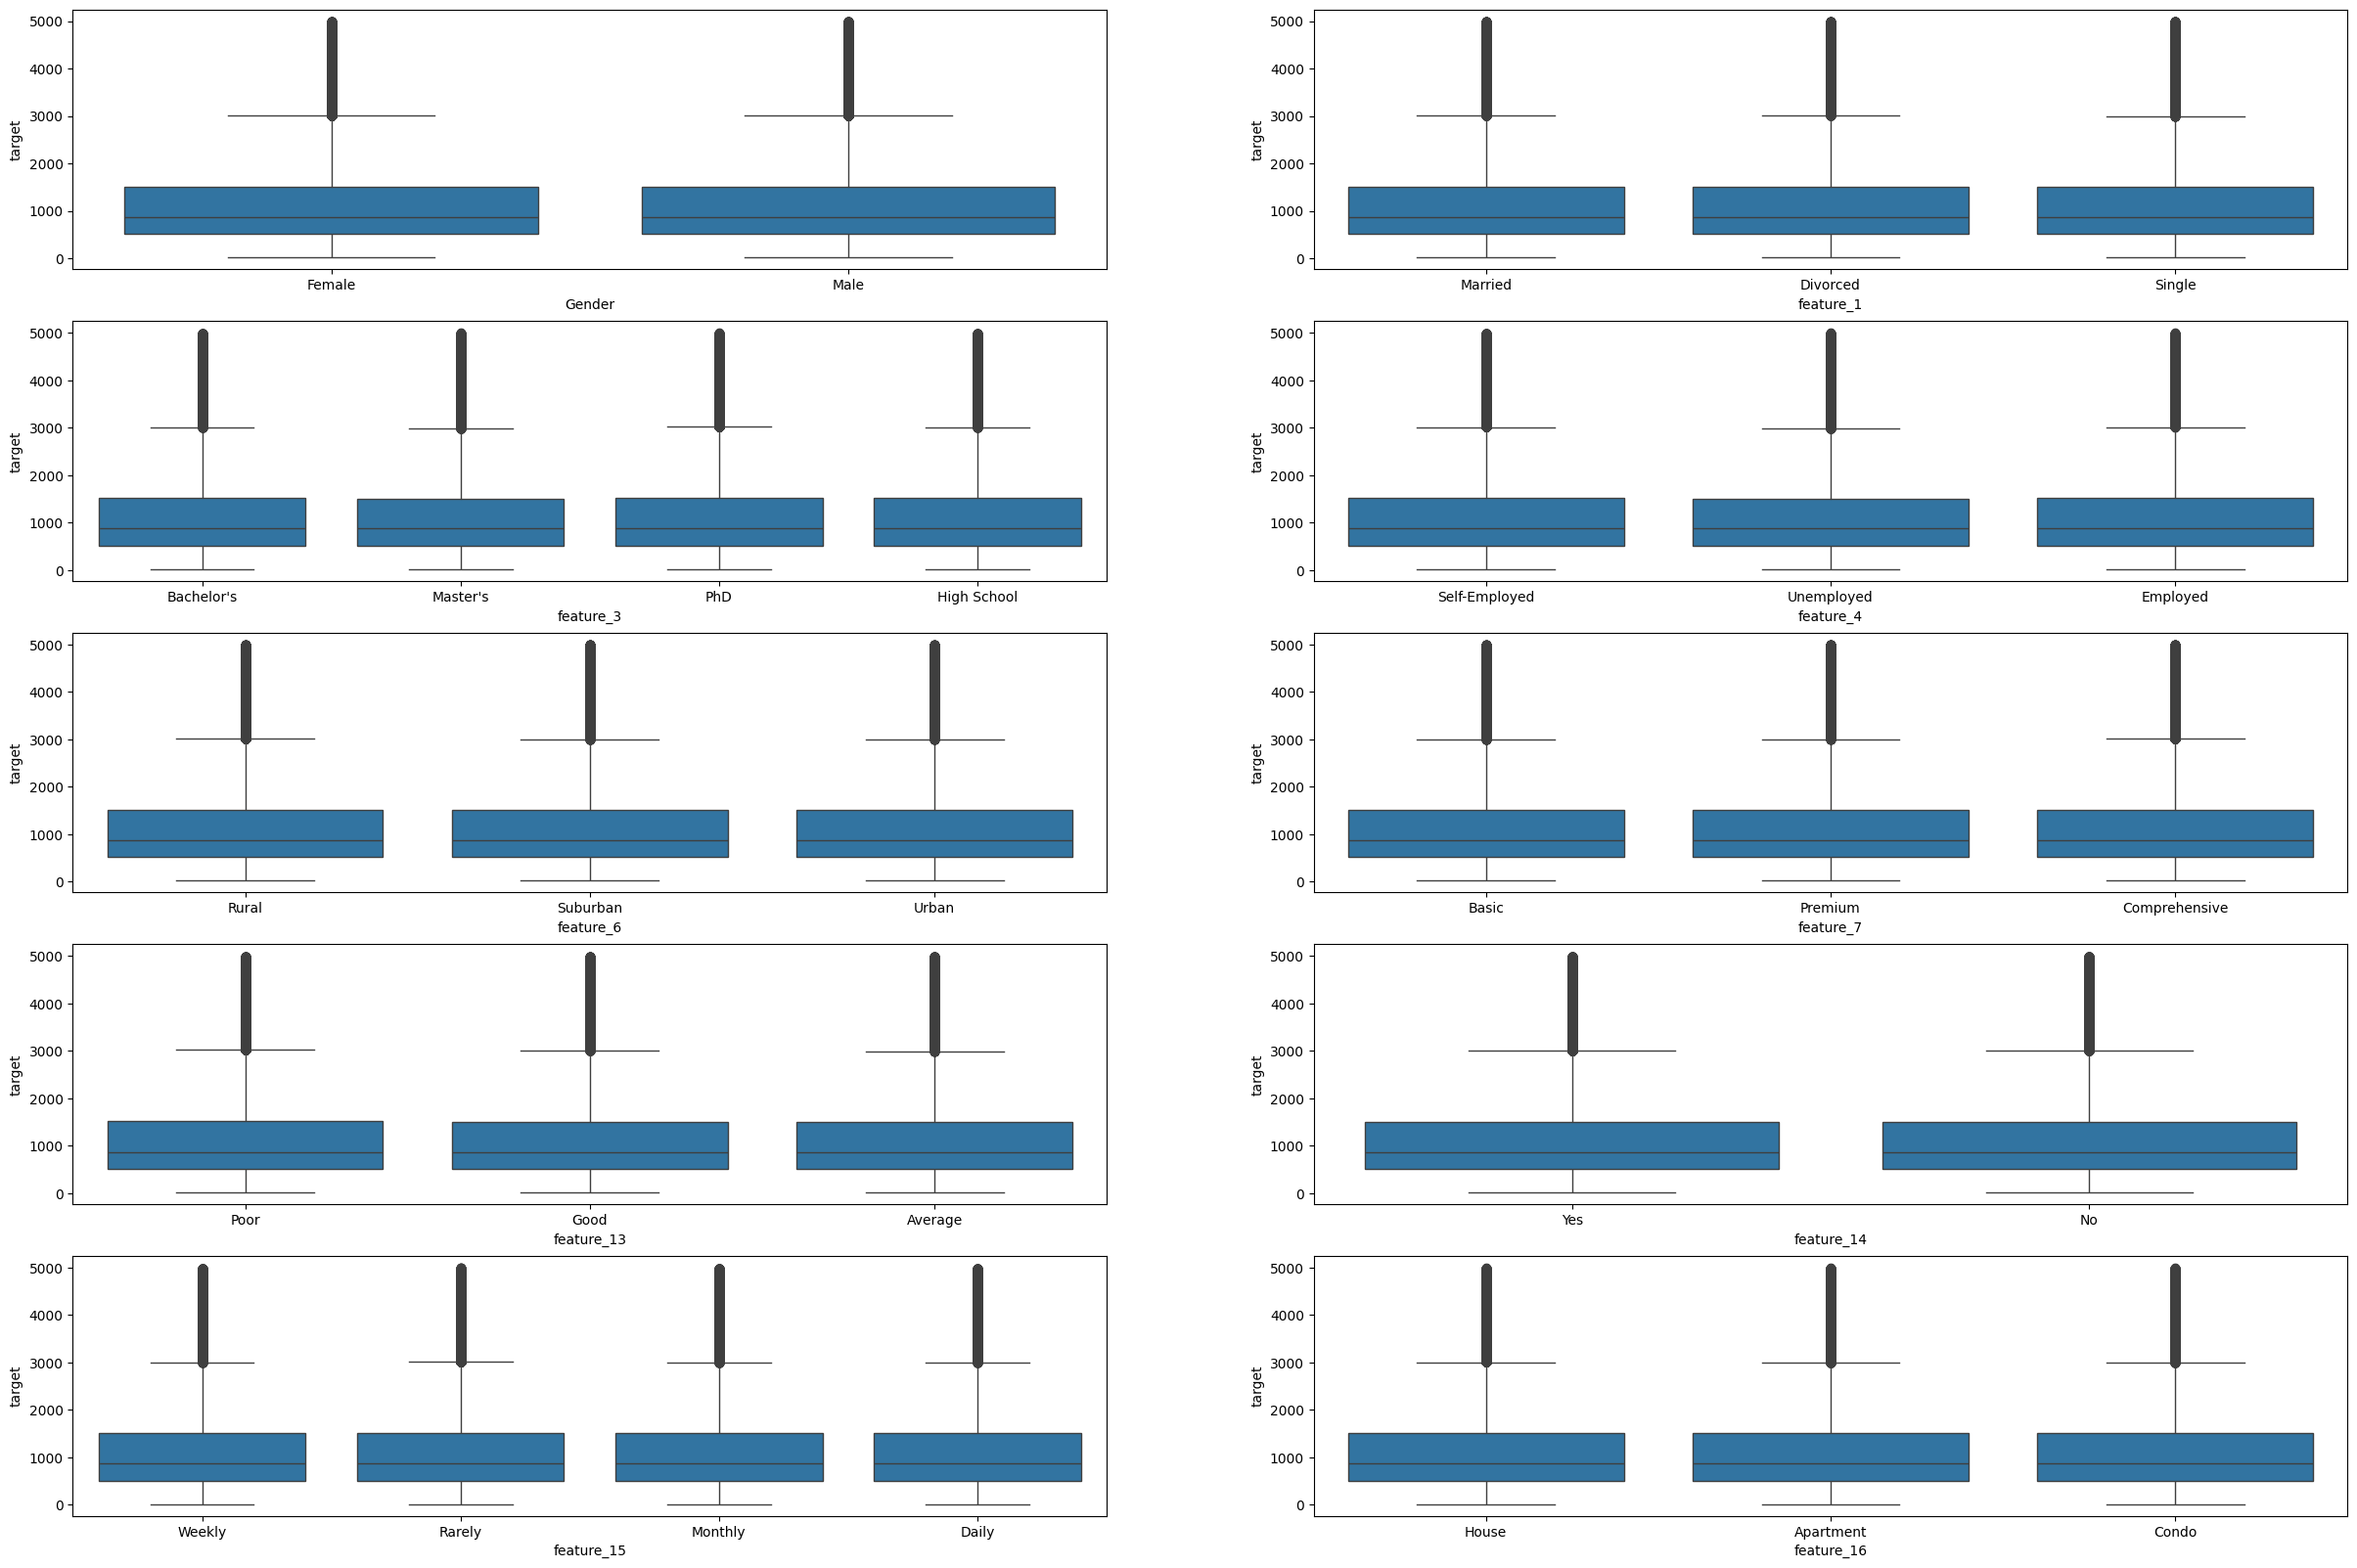

In [8]:
fig, ax = plt.subplots(5, 2, figsize=(30, 20))
for variable, subplot in zip(categorical_features.columns, ax.flatten()):
    sns.boxplot(x = test[variable], y = train['target'], ax=subplot)

- Surprisingly, the distribution of target in all unique values of each feature is the same.
- Also these box plots reveal that `feature_3`, `feature_7`, `feature_13`, and `feature_15` are strong predictors of the target, with clear ordinal trends. Features like Gender and feature_14 have a weaker impact.

### Numerical columns

- First, we would check out the outliers.

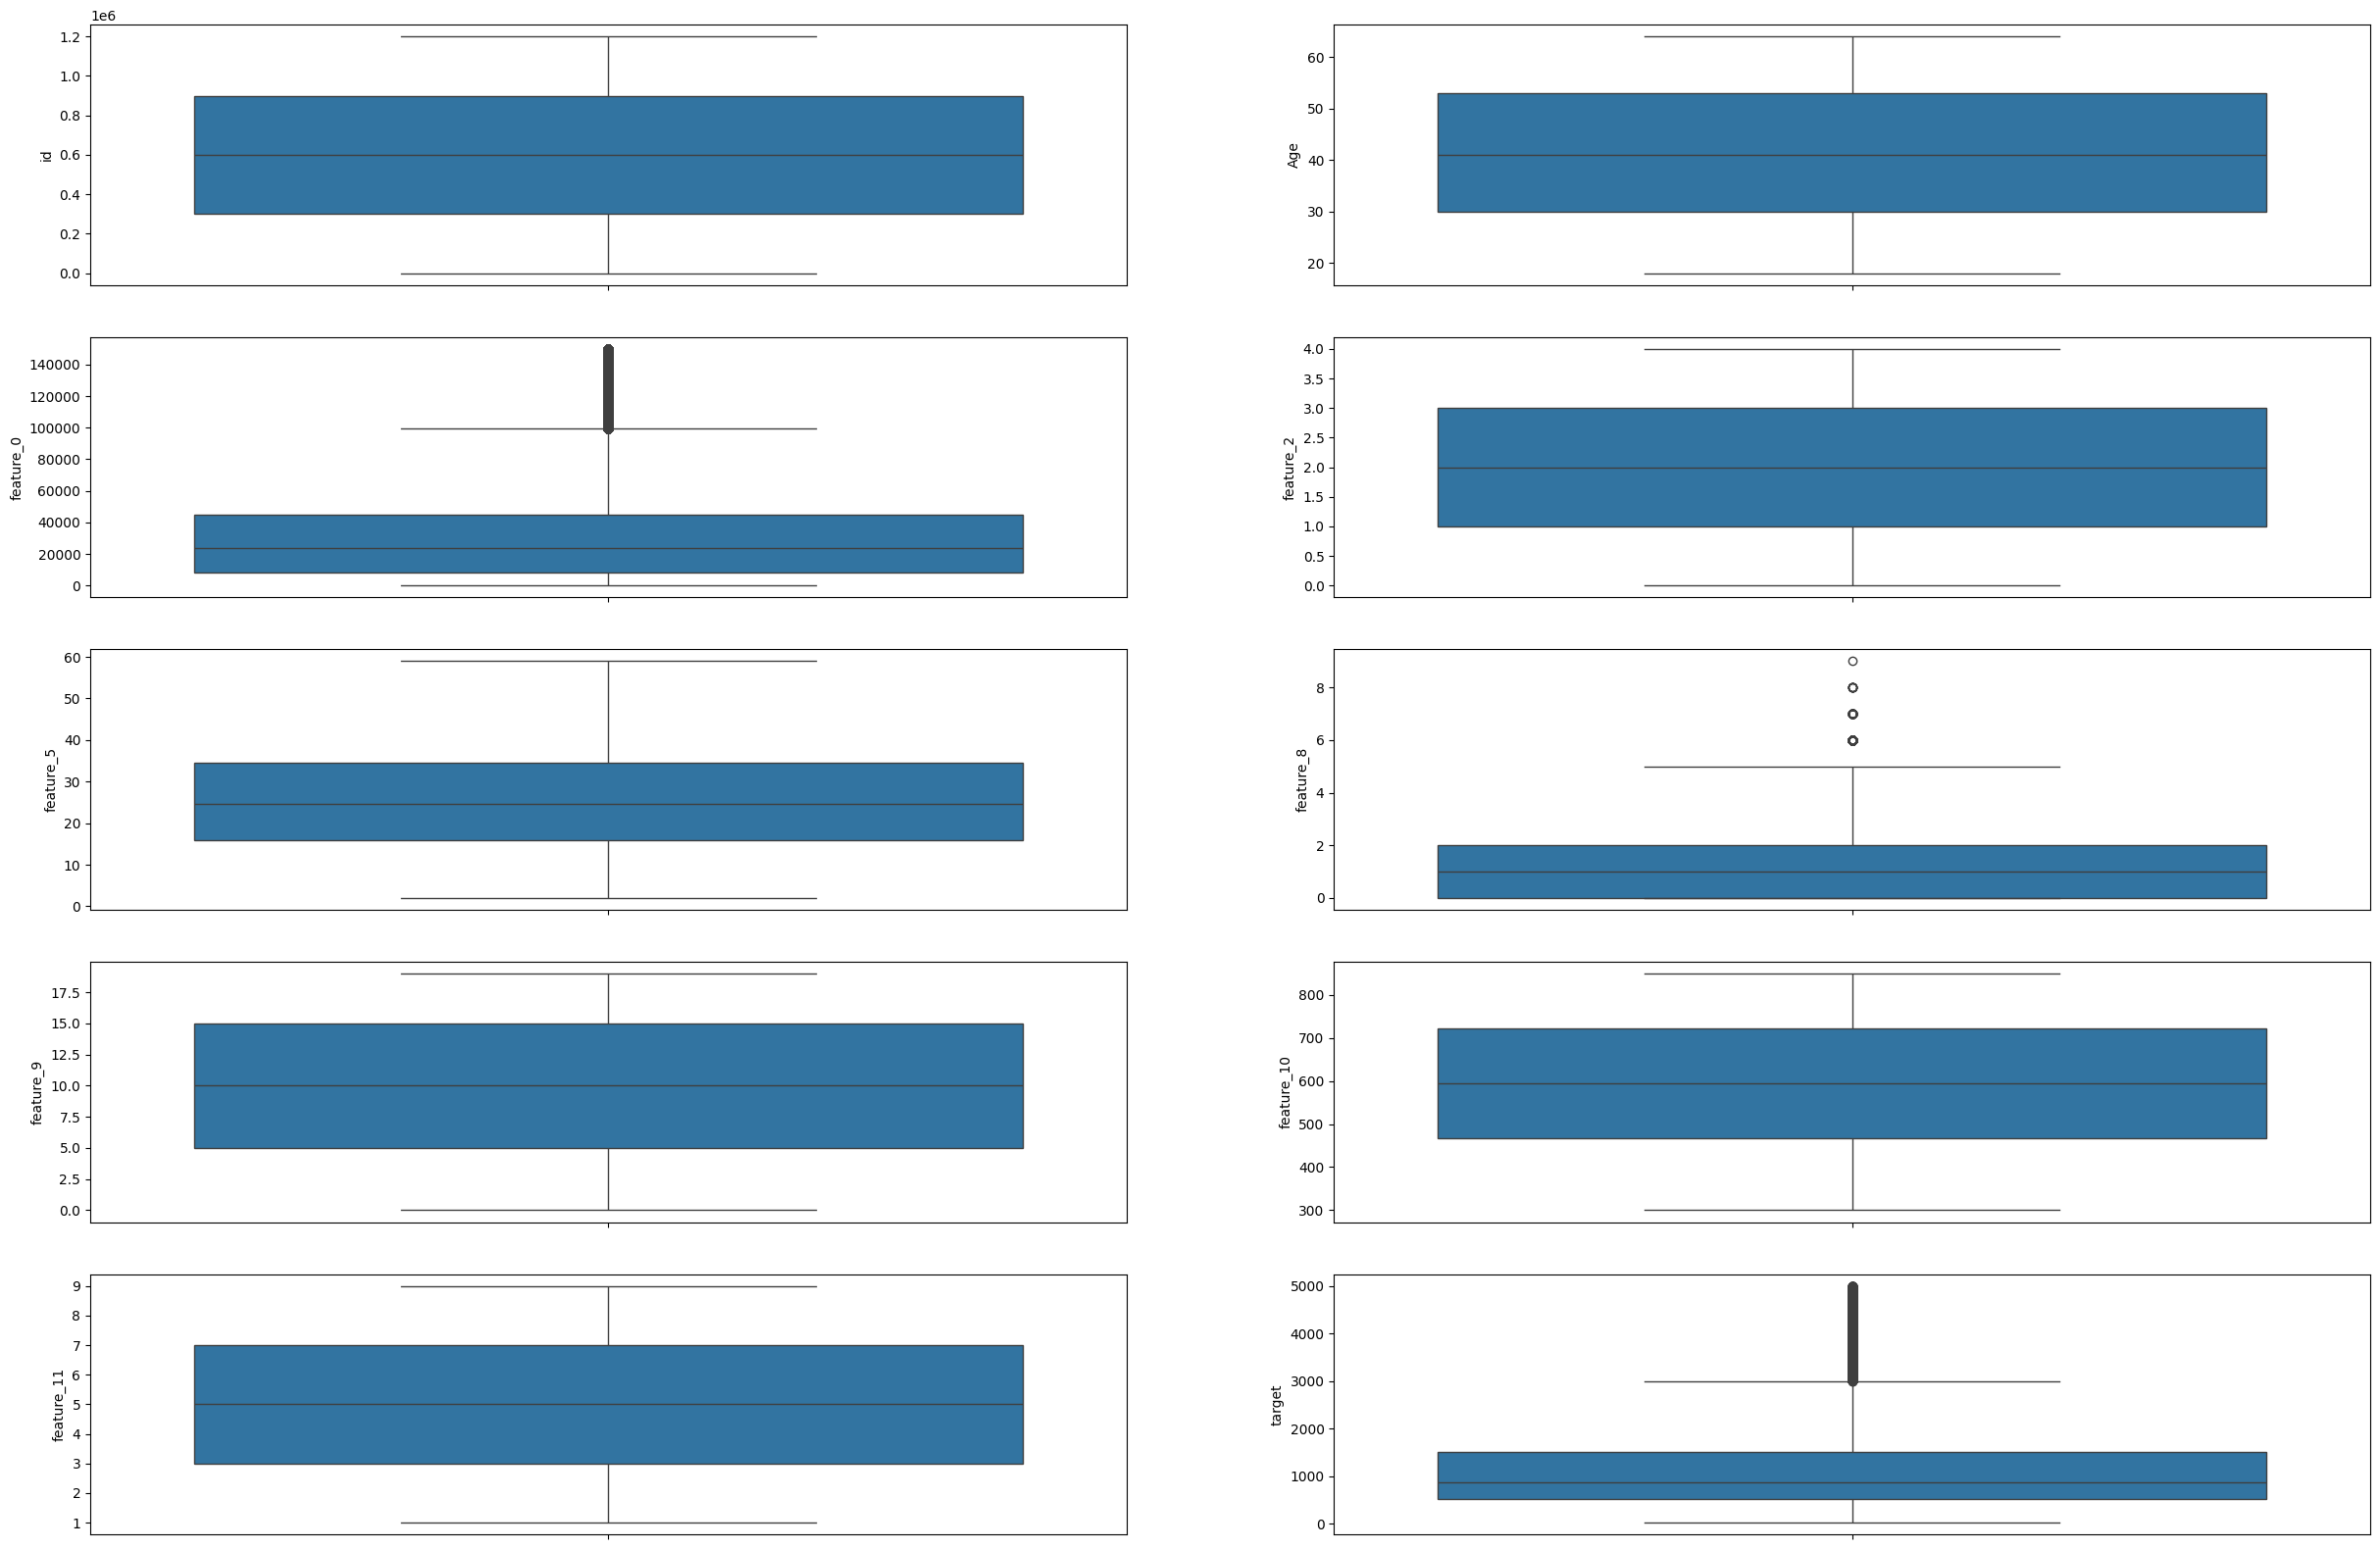

In [9]:
numerical_features = train.select_dtypes(include=[np.number])
# Use boxplot to visualize the distribution of numerical features
fig, ax = plt.subplots(5, 2, figsize=(30, 20))
for variable, subplot in zip(numerical_features.columns, ax.flatten()):
    sns.boxplot(train[variable], ax=subplot)

As can be seen that, only `feature_0` and `feature_8` have outliers, so we could use log transformation on these features.

- Now let check the distribution of these features to see if they follow the normal distribution or not.

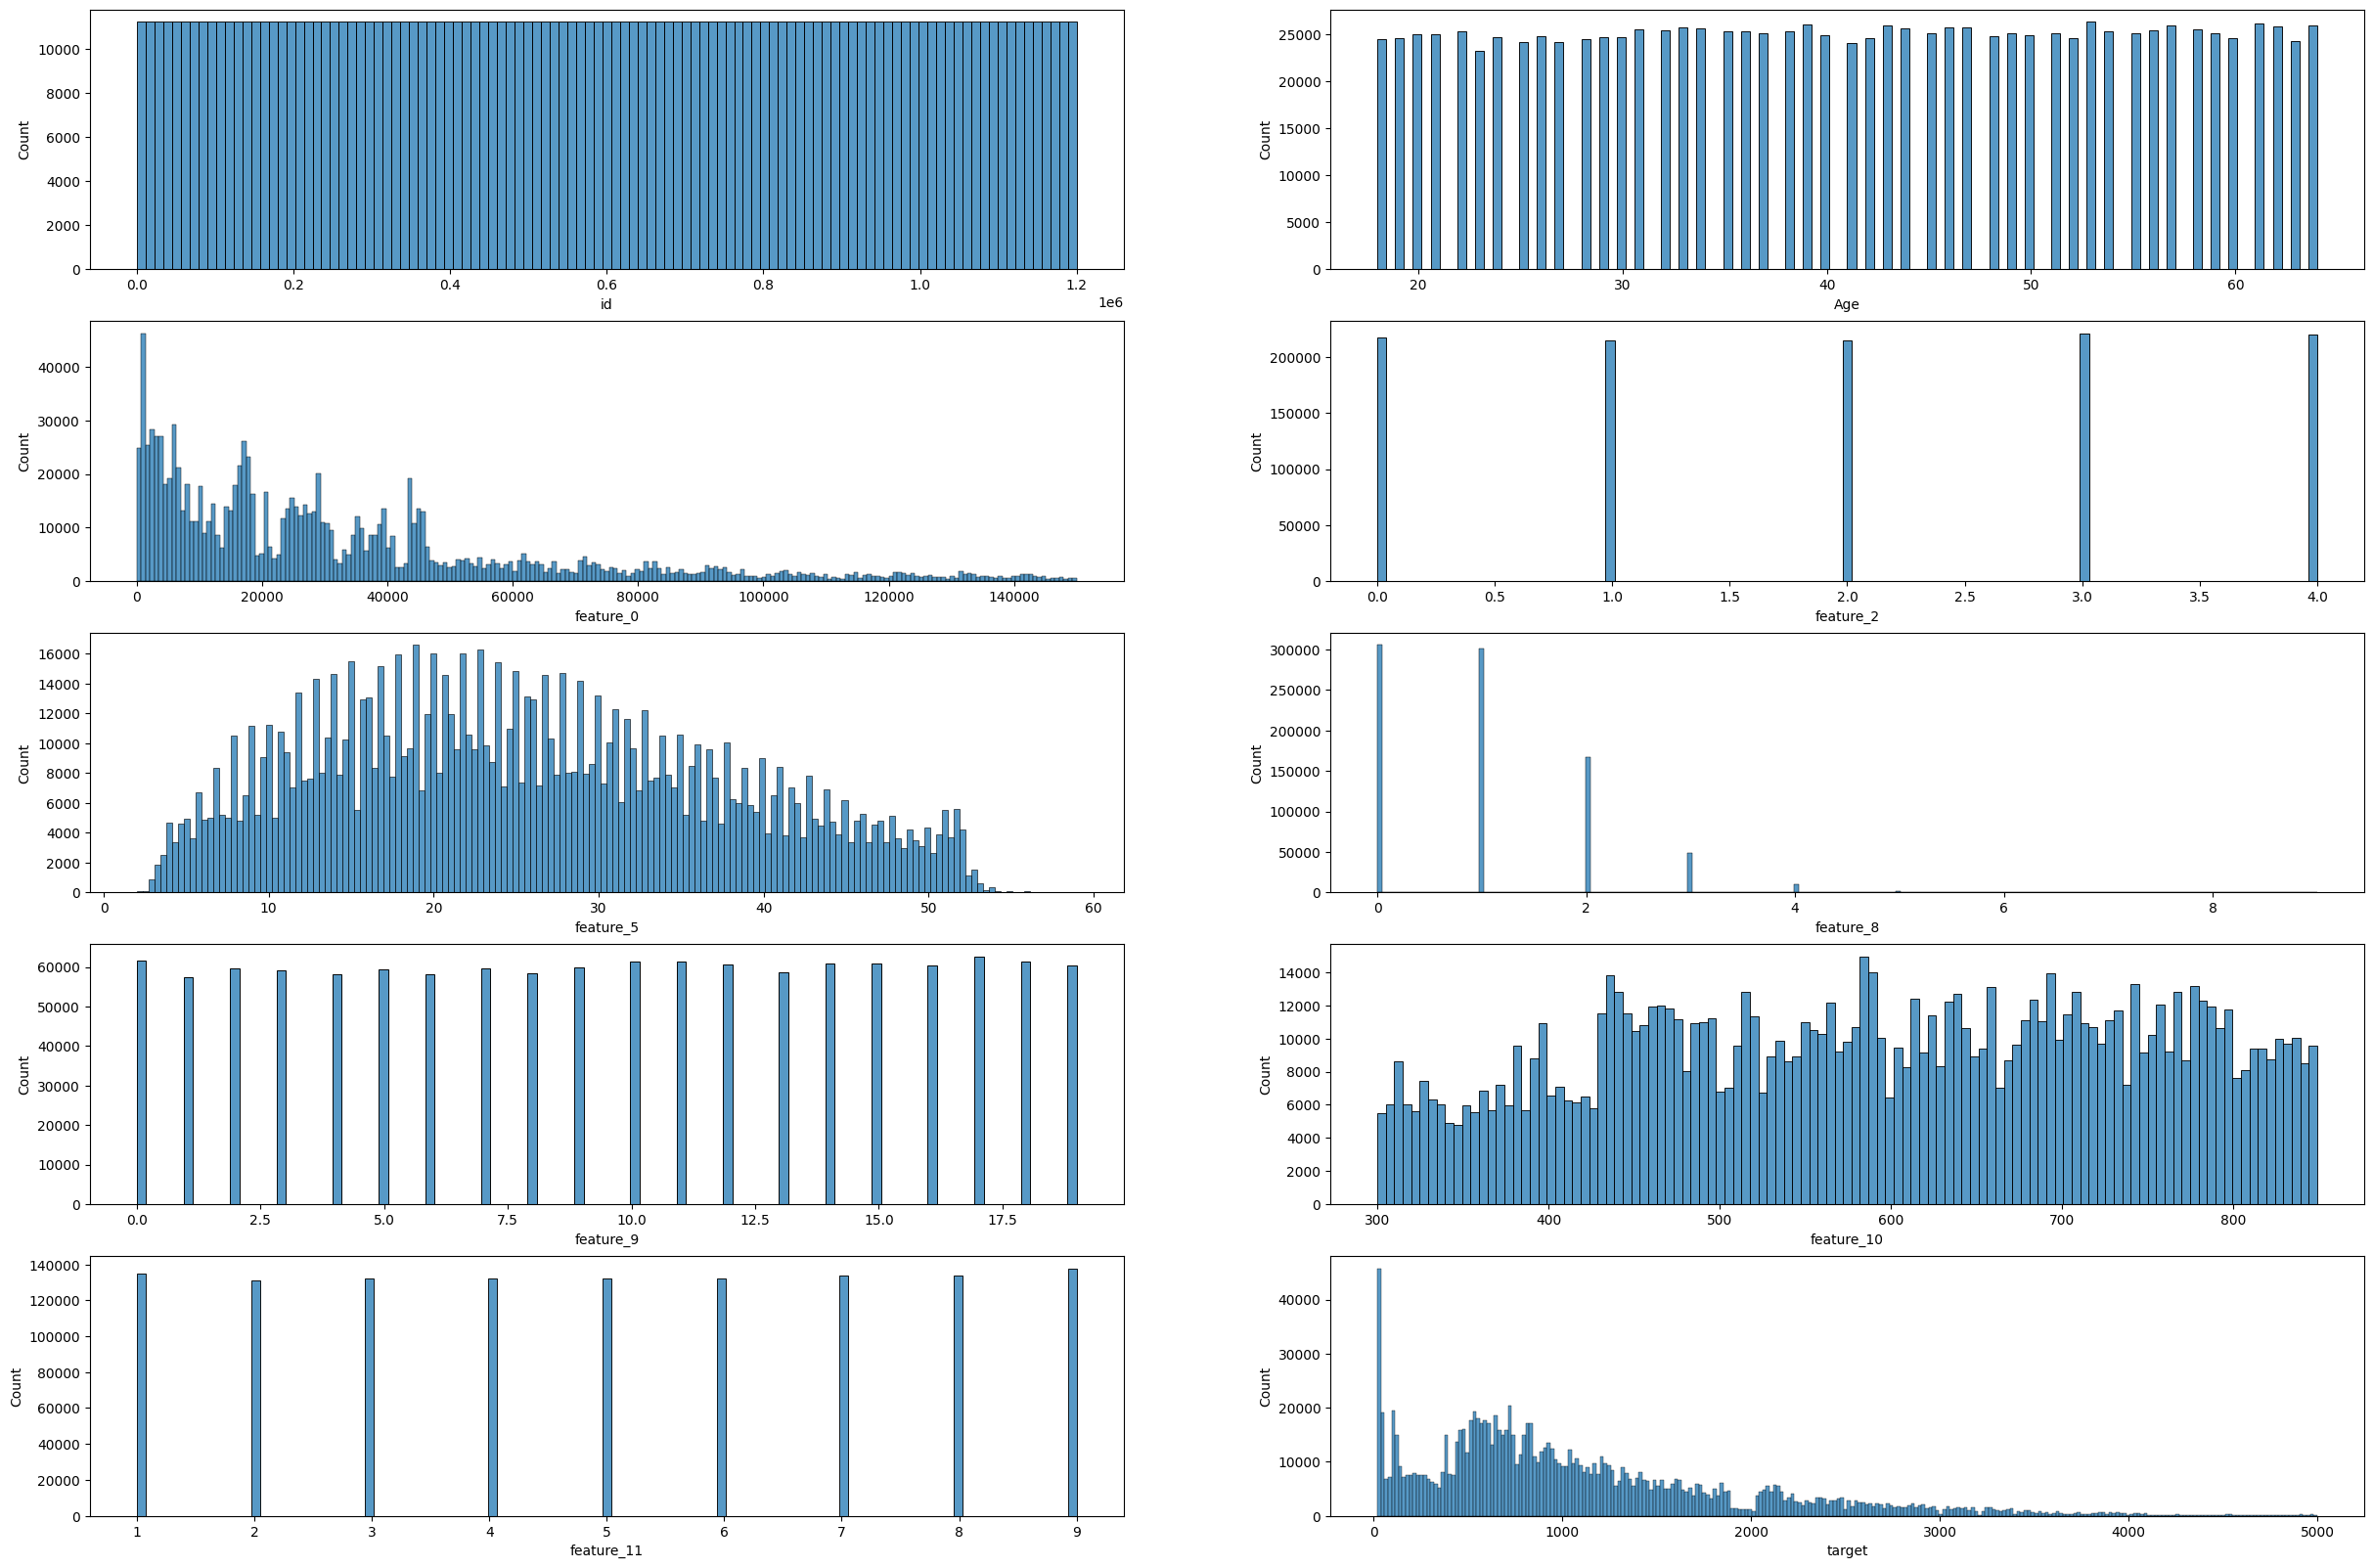

In [10]:
# Plot the distribution of numerical features
fig, ax = plt.subplots(5, 2, figsize=(30, 20))
for variable, subplot in zip(numerical_features.columns, ax.flatten()):
    sns.histplot(train[variable], ax=subplot)
    

- So from the first view, we could realize that. So the numerical features here are `age`, `feature_0` and `feature_5` and these features seem to be normally distributed, but we use tree models therefore no need to scale these features. But `target` and `feature_0` are skewed therefore we will apply log transformation as well.

### Missing Values

In [11]:
# Check for missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_ratio = missing_values / len(train) * 100
missing_values = pd.concat([missing_values, missing_ratio], axis=1, keys=['Total', 'Ratio'])
missing_values

,Total,Ratio
feature_11,1,0.000083
feature_9,6,0.000500
feature_1,18529,1.544083
Age,18705,1.558750
feature_0,44949,3.745750
feature_5,74076,6.173000
feature_13,77824,6.485333
feature_2,109672,9.139333
feature_10,137882,11.490167
feature_4,358075,29.839583


In [12]:
numerical_missing_vals = ['Age', 'feature_0', 'feature_2', 'feature_5', 'feature_8', 'feature_9', 'feature_10', 'feature_11']
categorical_missing_vals = ['feature_1', 'feature_4', 'feature_13']


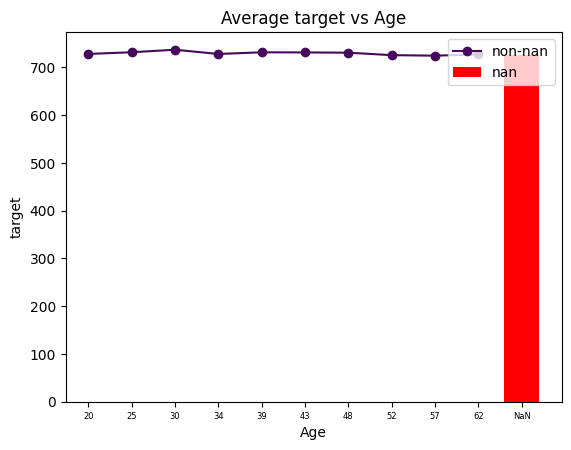

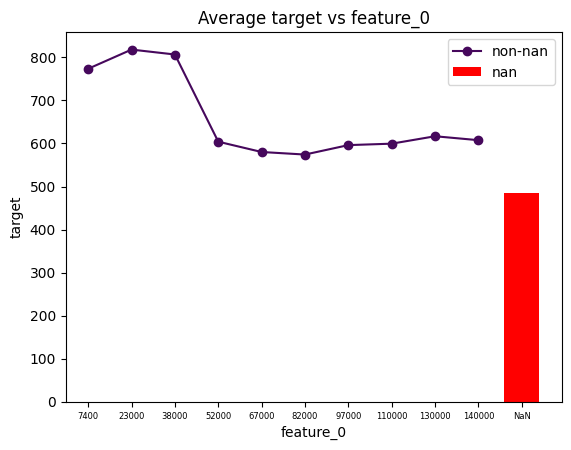

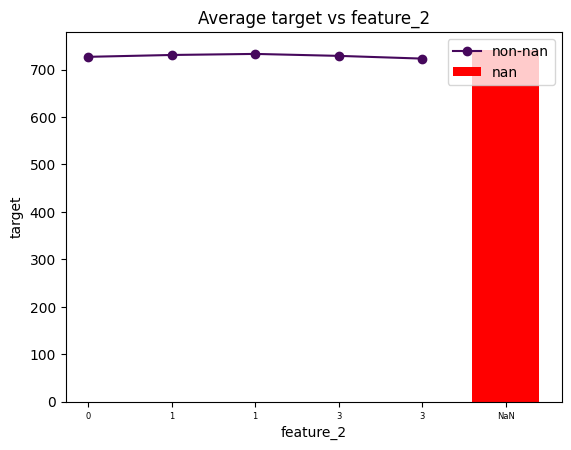

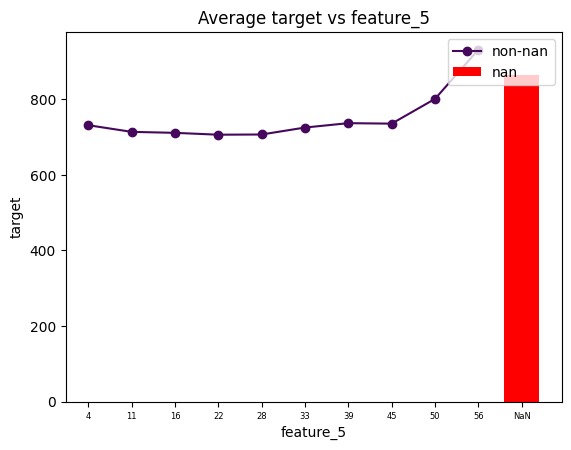

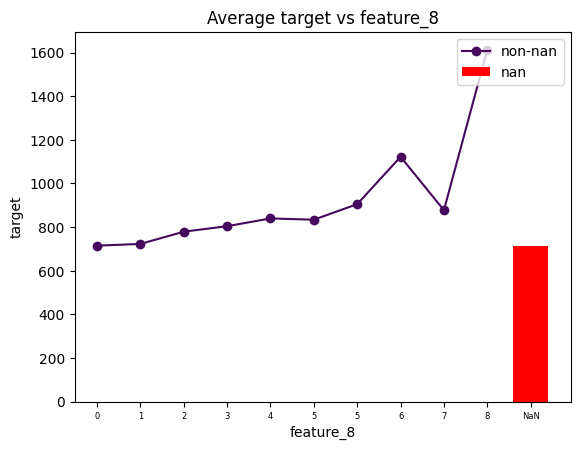

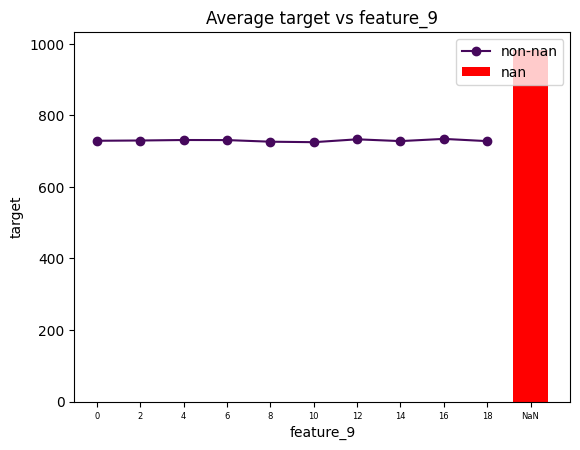

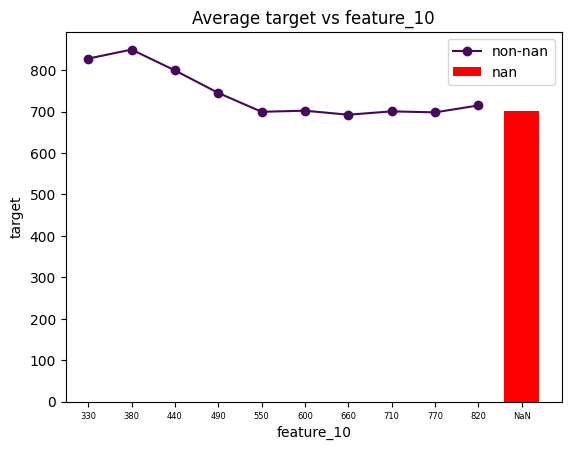

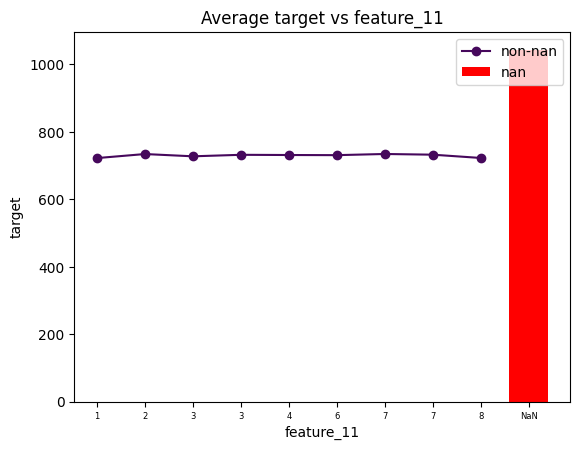

In [13]:
from matplotlib.cm import viridis

for column in numerical_missing_vals:
    # Drop NaN values for binning, but retain the NaN group separately
    valid_data = train[column].dropna()
    bins = 10  

    # Bin the non-NaN values
    binned_data = pd.cut(valid_data, bins)
    df = pd.DataFrame({
        column: binned_data,
        'target': train.loc[valid_data.index, 'target']
    })
    
    # Group by the binned column and calculate mean target
    grouped = df.groupby(column, observed=True, dropna=False).agg(
        lambda x: np.expm1(np.log1p(x).mean())
    ).reset_index()
    
    # Add the NaN group separately
    nan_group_mean = np.expm1(np.log1p(train.loc[train[column].isnull(), 'target']).mean())
    nan_group = pd.DataFrame({column: ['NaN'], 'target': [nan_group_mean]})
    
    # Concatenate the NaN group with the grouped data
    grouped = pd.concat([grouped, nan_group], ignore_index=True)
    
    def label(x):
        if isinstance(x, float) or x == 'NaN':
            return x
        x = x.mid  # Get the midpoint of the interval
        s = int(np.floor(np.log10(x)))
        return int(round(x, -s+1))

    # Select the viridis color
    viridis_colors = viridis(range(256))
    line_color = viridis_colors[5]  

    # Plot the non-NaN bins as a line plot
    plt.plot(grouped[:-1]['target'], marker='o', color=line_color, label='non-nan')

    # Plot the NaN bin as a bar
    plt.bar(len(grouped) - 1, grouped.iloc[-1]['target'], color='red', label='nan')

    # Set x-ticks and labels
    plt.xticks(range(len(grouped)), labels=grouped[column].apply(label), fontsize=6)
    plt.title(f'Average target vs {column}')
    plt.xlabel(column)
    plt.ylabel('target')
    plt.legend(loc='upper right')
    plt.show()

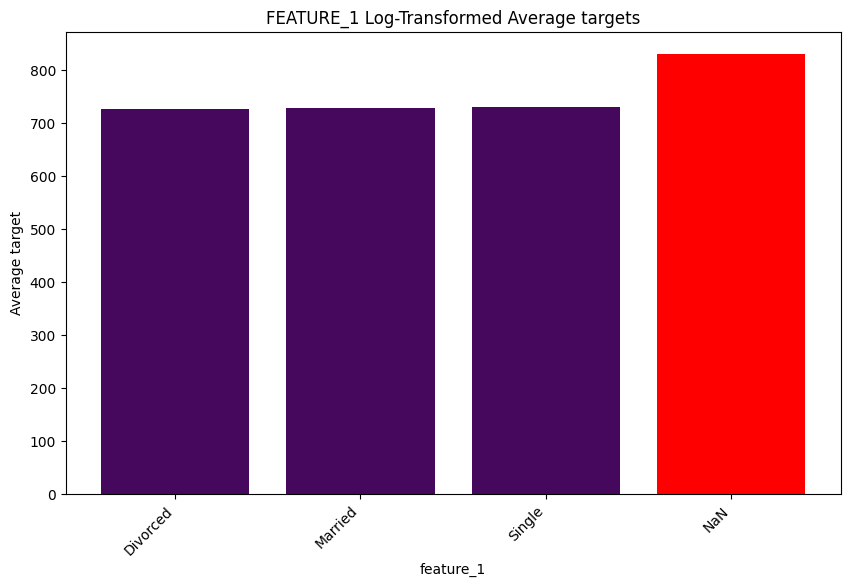

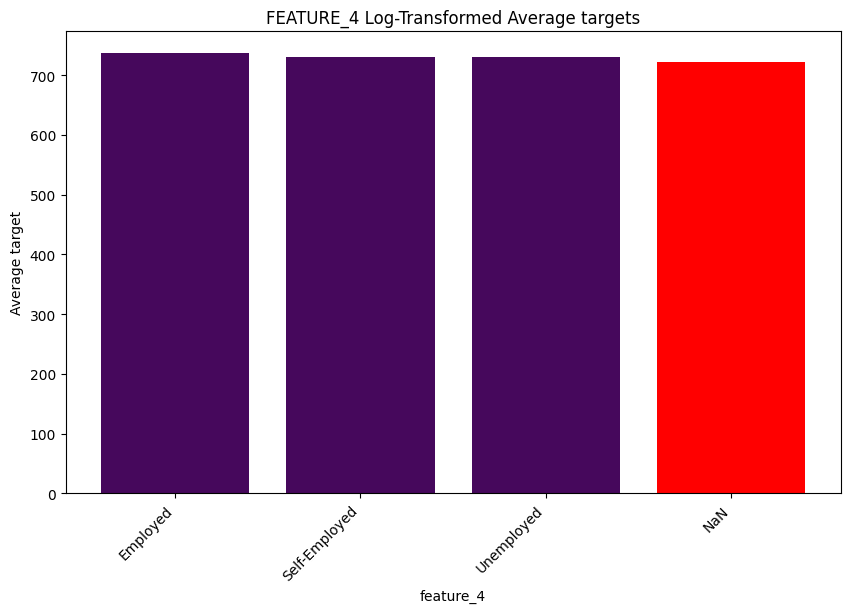

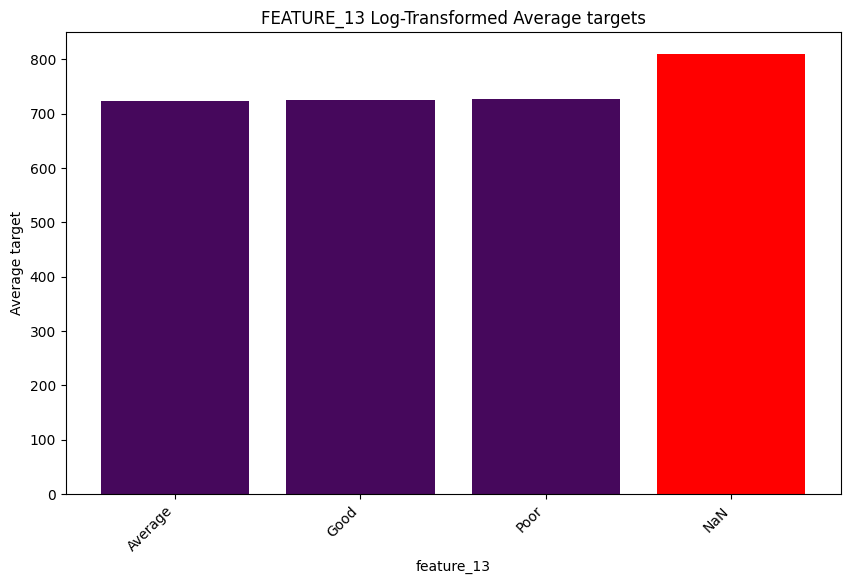

In [14]:
for column in categorical_missing_vals:
    # Group by the column and calculate the average log-transformed target
    grouped = train.groupby(column)['target'].agg(
        lambda x: np.expm1(np.log1p(x).mean())  # Use log-transform to calculate mean
    ).reset_index()
    
    # Calculate the average log-transformed target for missing (NaN) values
    nan_group_mean = np.expm1(np.log1p(train.loc[train[column].isnull(), 'target']).mean())
    
    # Add a row for the NaN group
    nan_group = pd.DataFrame({column: ['NaN'], 'target': [nan_group_mean]})
    grouped = pd.concat([grouped, nan_group], ignore_index=True)
    
    # Use viridis color palette for the bars
    viridis_colors = viridis(range(256))  
    bar_colors = [viridis_colors[5]] * (len(grouped) - 1) + ['red']  

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(grouped[column].astype(str), grouped['target'], color=bar_colors)
    
    # Set labels and title
    plt.title(f'{column.upper()} Log-Transformed Average targets')
    plt.ylabel('Average target')
    plt.xlabel(column)
    plt.xticks(rotation=45, ha='right')  
    plt.show()

- Many of the NAN values have an associated `target` not represented by any of the not-NAN's relationship to `target`. This means that NAN contains additional information and we do not want to impute it and hide NANs from our models.
- So these NANs are giving us additional information and we do not want to hide these NANs by naively imputing them. 
- Impute NAN to a reasonable value (like mean) after first adding a new column to record the NAN (i.e. train[f"is_{c}_na"] = train[c].isna() then impute original column).

### Data type

In [15]:
for col in train.columns:
    print(f"Column: {col}, Data Type: {train[col].dtype}")

Column: id, Data Type: int64
Column: Age, Data Type: float64
Column: Gender, Data Type: object
Column: feature_0, Data Type: float64
Column: feature_1, Data Type: object
Column: feature_2, Data Type: float64
Column: feature_3, Data Type: object
Column: feature_4, Data Type: object
Column: feature_5, Data Type: float64
Column: feature_6, Data Type: object
Column: feature_7, Data Type: object
Column: feature_8, Data Type: float64
Column: feature_9, Data Type: float64
Column: feature_10, Data Type: float64
Column: feature_11, Data Type: float64
Column: feature_12, Data Type: object
Column: feature_13, Data Type: object
Column: feature_14, Data Type: object
Column: feature_15, Data Type: object
Column: feature_16, Data Type: object
Column: target, Data Type: float64


- So we need to convert all types that have `int64` to `int8` and if object features get `one-hot encoded` we also need to convert `float64` to `float32`.

### Correlation heatmap

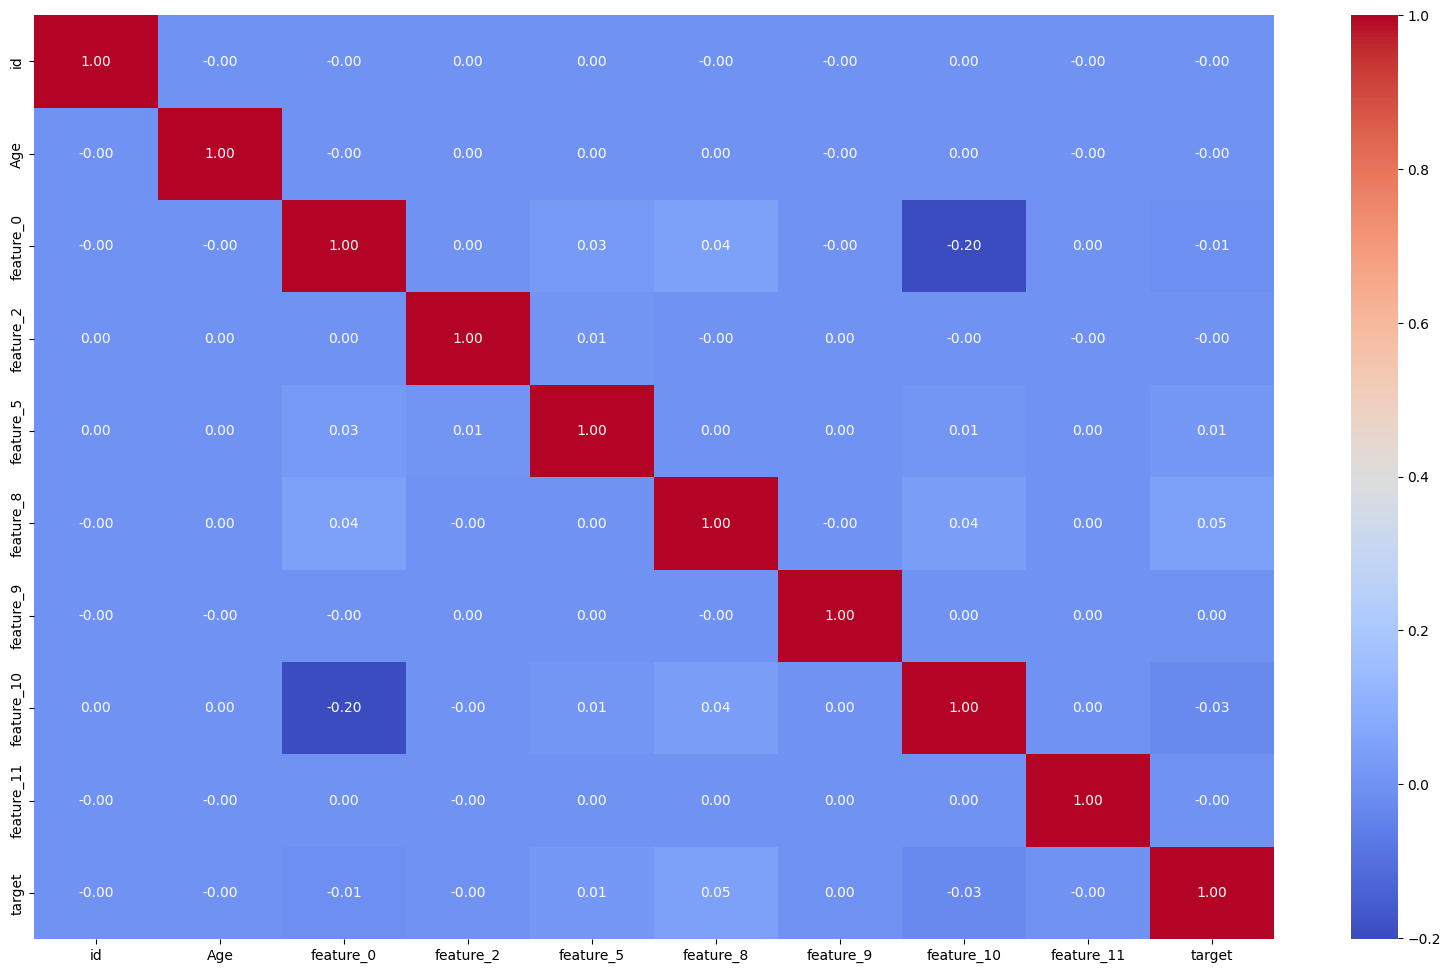

In [16]:
plt.figure(figsize=(20, 12))
numerical_features = train.select_dtypes(include=[np.number])
sns.heatmap(numerical_features.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

1. **Feature_10:**

    - The correlation with Feature_0 is Feature_10 at -0.20, which is the most remarkable.
    - This weak negative correlation suggests that as Feature_10 increases, the Feature_0 tends to decrease slightly.
    - Also the strongest negative correlation with target is found in feature_10 as well.
2. **Feature_8:**

    - The second strongest correlation with the target is Feature_8 at 0.05.
    - This very weak positive correlation suggests that Feature_8 has a minimal linear relationship with the target.
3. **Other Features:**

    - Most features (e.g., Feature_0, Feature_2, Feature_5, etc.) have correlations close to 0 with the target.
    - These features may not have a significant linear impact on the target variable but could still contribute non-linearly.
4. **Feature Independence:**

    - The low correlations between features indicate minimal multicollinearity, which is beneficial for models like linear regression and tree-based models.